# Evaluate the Effect of Temperature
See how the void growth rates and mobility terms change as a function of temperature

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import json

## Load Results
Each of the result folders in [the void tracking directory](../1_void-tracking) are named after the temperature and contain a file which contains the void growth and mobility functions.

In [2]:
dynamics_terms = []
for path in Path('../1_void-tracking/output/').glob('8bitTIFF-*/model-parameters.json'):
    # Get the temperature
    temperature = float(path.parent.name.split("-")[-1][:-1])  # Directories are named [...]-[temp]C
    terms = {'temp': temperature}
    
    # Load the model parameters
    params = json.loads(path.read_text())
    for key, p in params.items():
        # The terms are always in the same order.
        
        for name, v in zip(['alpha.0', 'alpha.1', 'beta.0', 'beta.1'], p):
            terms[f'{key}.{name}'] = v
    
    dynamics_terms.append(terms)
dynamics_terms = pd.DataFrame(dynamics_terms).sort_values('temp')

In [3]:
dynamics_terms

,temp,growth.alpha.0,growth.alpha.1,growth.beta.0,growth.beta.1,movement.alpha.0,movement.alpha.1,movement.beta.0,movement.beta.1
2,550.0,-0.008871,0.000456,-1.331562,0.017431,-3.188518,-0.111996,0.196401,-0.000773
0,575.0,-0.002343,0.000413,-1.451983,-0.128573,-2.568087,-0.417081,0.070419,0.000197
3,600.0,-0.000066,0.000339,-1.374503,0.027051,-2.369227,0.147857,0.114603,-0.007281
1,625.0,-0.001052,0.000855,-2.114024,-0.001187,-2.368772,-0.236007,0.098535,0.005250


## Plot the Effect of Temperature on Growth
See if there is a consistent trend

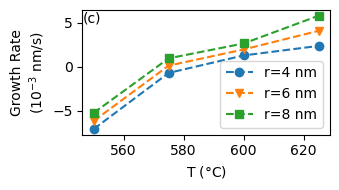

In [4]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

for r, m in zip([4, 6, 8], 'ovs'):
    ax.errorbar(dynamics_terms['temp'],
                y=(dynamics_terms['growth.alpha.0'] + r * dynamics_terms['growth.alpha.1']) * 1e3,
                #yerr=np.power(10, dynamics_terms['growth.beta.0'] + r * dynamics_terms['growth.beta.1']), 
               fmt=f'--{m}', label=f'r={r} nm')

ax.text(0, 0.9, '(c)', transform=ax.transAxes, fontsize=10)
ax.set_xlabel('T ($\\degree$C)')
ax.set_ylabel('Growth Rate\n($10^{-3}$ nm/s)')
ax.legend()
#ax.set_ylim(-0.02, 0.02)

fig.tight_layout()
fig.savefig('figures/growth-vs-temperature.png', dpi=320)

Notes:
- We are less confident in the 525C voids because they are in a different imaging mode. Mention that in the report